In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 10.
H = 10.
nt = 100
nx = 100
ny = 100
c= 3

dx = L/(nx-1)
dy = H/(ny-1)
dh = dx
dt = dh/4.24
C2 = ((c**2) * ((dt/dh)**2))
Ui = numpy.ones((ny, nx)) #n+1
Un = Ui.copy() #n
Unx = Un.copy() #n-1
x= numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

In [3]:
#Applying initial conditions.
def special_condition(C2, Uarray, Un):
    for n in range (nt):
        Uarray[1:-1,1:-1] = Un[1:-1, 1:-1] + (1/2) * C2 * (Un[2:,1:-1] + Un[0:-2,1:-1]+ Un[1:-1,2:] - 4*Un[1:-1,1:-1])
    return Uarray

In [18]:
def ftcs(Uarray, nt, dt, dh, C2, Un, Unx):
      
    for n in range(nt):   
        Uarray[1:-1, 1:-1] = 2*Un[1:-1, 1:-1] - Unx[1:-1, 1:-1] + (C2) *(Un[2:, 1:-1]+ Un[0:-2,1:-1]+ Un[1:-1,2:] - 4*Un[1:-1,1:-1])
    
    #Applying Boundary Conditions
    Uarray[0,:] = 0
    Uarray[nt-1, :] = 0
    Uarray[:,0] = 0
    Uarray[:, nt-1] = 0

    return Uarray

In [5]:
def initial_condition(Ui,L, x, y, nx):
    for i in range(0,nx):
        Ui[i,:] = (numpy.sin((numpy.pi*x[i])/L))*(numpy.sin((numpy.pi*y[i])/L))
    return Ui

In [19]:
xsd = initial_condition(Ui, L, x, y, nx)

In [20]:
xsd1 = special_condition(C2, xsd.copy(), xsd.copy())

In [21]:
xsd2 = ftcs(xsd1.copy(), nt, dt,dh, C2, xsd1.copy(), xsd1.copy())

In [22]:
xsd2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00150859,  0.00150859, ...,  0.00150859,
         0.00150859,  0.        ],
       [ 0.        ,  0.0030086 ,  0.0030086 , ...,  0.0030086 ,
         0.0030086 ,  0.        ],
       ..., 
       [ 0.        ,  0.0030086 ,  0.0030086 , ...,  0.0030086 ,
         0.0030086 ,  0.        ],
       [ 0.        ,  0.00150859,  0.00150859, ...,  0.00150859,
         0.00150859,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
len(xsd2)

100

In [11]:
time = numpy.linspace(0, nt, nx)

In [29]:
def plot_3D(x, y, p):
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

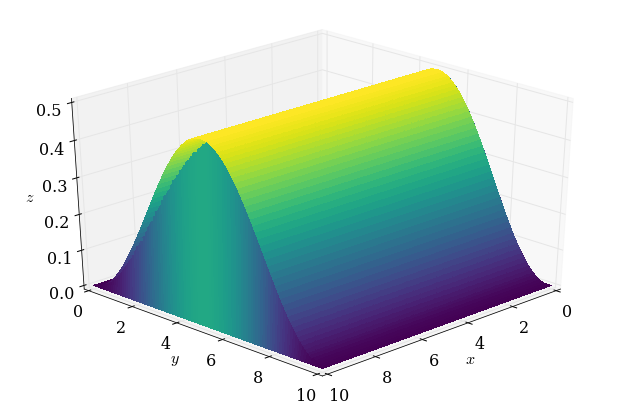

In [30]:
plot_3D(x,y,xsd2)